# **任务描述：**

构建一个模型，根据鸢尾花的花萼和花瓣大小将其分为三种不同的品种。

![](https://ai-studio-static-online.cdn.bcebos.com/dd74666475b549fcae99ac2aff67488f015cdd76569d4d208909983bcf40fe3c)


# **数据集**
总共包含150行数据

每一行数据由 4 个特征值及一个目标值组成。

4 个特征值分别为：萼片长度、萼片宽度、花瓣长度、花瓣宽度

目标值为三种不同类别的鸢尾花，分别为：	Iris Setosa、Iris Versicolour、Iris Virginica

![](https://ai-studio-static-online.cdn.bcebos.com/8bdc417331ef45d5a380d2769f3a8bcd7b361212b20d4e78b2a32ee9c7a7b1fa)


**首先导入必要的包：**

**numpy**：python第三方库，用于科学计算

**matplotlib**:python第三方库，主要用于进行可视化

**sklearn**:python的重要机器学习库，其中封装了大量的机器学习算法，如：分类、回归、降维以及聚类

In [1]:
import numpy as np                
from matplotlib import colors     

from sklearn import model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#若提示缺少matplotlib，则可使用以下命令pip安装matplotlib
#!pip install matplotlib

# **Step1.数据准备**

(1)从指定路径下加载数据

(2)对加载的数据进行数据分割，x_train,y_train,x_test,y_test分别表示训练集特征、训练集标签、测试集特征、测试集标签

In [2]:
#*************将字符串转为整型，便于数据加载***********************
def iris_type(s):
    it = {b'Iris-setosa':0, b'Iris-versicolor':1, b'Iris-virginica':2}
    return it[s]

In [6]:
#加载数据
data_path='/home/aistudio/data/data2301/iris.data'          #数据文件的路径
data = np.loadtxt(data_path,                                #数据文件路径
                  dtype=float ,                              #数据类型
                  delimiter=',' ,                            #数据分隔符
                  converters={4 :iris_type})                 #将第5列使用函数iris_type进行转换
#print(data)                                                #data为二维数组，data.shape=(150, 5)
#print(data.shape)
#数据分割
x, y = np.split(data,                                       #要切分的数组
                (4 ,),                                       #沿轴切分的位置，第5列开始往后为y
                axis=1 )                                     #代表纵向分割，按列分割
x = x[:,  0:2 ]                                               #在X中我们取前两列作为特征，为了后面的可视化。x[:,0:2]代表第一维(行)全取，第二维(列)取0~2
#print(x)
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,              #所要划分的样本特征集
                                                               y,              #所要划分的样本结果
                                                               random_state=1 , #随机数种子
                                                               test_size=0.2 )  #测试样本占比

# **Step2.模型搭建**

C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。
C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。

kernel='linear'时，为线性核

decision_function_shape='ovr'时，为one v rest，即一个类别与其他类别进行划分，

decision_function_shape='ovo'时，为one v one，即将类别两两之间进行划分，用二分类的方法模拟多分类的结果。

In [10]:
#**********************SVM分类器构建*************************
def classifier():
    clf = svm.SVC(C=0.8 ,                         #误差项惩罚系数,默认值是1
                  kernel='linear',               #线性核 kenrel="rbf":高斯核
                  decision_function_shape='ovr') #决策函数
    return clf

In [12]:
from sklearn import model_selection, svm

# 2.定义模型：SVM模型定义
clf = classifier()

# **Step3.模型训练**

In [13]:
#***********************训练模型*****************************
def train(clf,x_train,y_train):
    clf.fit( x_train,         #训练集特征向量
            y_train.ravel()) #训练集目标值

In [14]:
# 3.训练SVM模型
train(clf,x_train,y_train )

# **Step4.模型评估**

In [15]:
#**************并判断a b是否相等，计算acc的均值*************
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print('%s Accuracy:%.3f' %(tip, np.mean(acc)))

In [16]:
def print_accuracy(clf,x_train,y_train,x_test,y_test):
    #分别打印训练集和测试集的准确率  score(x_train,y_train):表示输出x_train,y_train在模型上的准确率
    print('trianing prediction:%.3f' %(clf.score(x_train, y_train)))
    print('test data prediction:%.3f' %(clf.score(x_test, y_test)))
    #原始结果与预测结果进行对比   predict()表示对x_train样本进行预测，返回样本类别
    show_accuracy(clf.predict(x_train), y_train, 'traing data')
    show_accuracy(clf.predict(x_test), y_test, 'testing data')
    #计算决策函数的值，表示x到各分割平面的距离
    print('decision_function:\n', clf.decision_function(x_train))

In [17]:
# 4.模型评估
print_accuracy(clf,x_train,y_train,x_test,y_test)

trianing prediction:0.808
test data prediction:0.767
traing data Accuracy:0.808
testing data Accuracy:0.767
decision_function:
 [[-0.24991711  1.2042151   2.19527349]
 [-0.30144975  1.25525744  2.28694265]
 [-0.24281146  2.24318221  0.99502737]
 [-0.27672959  1.2395788   2.23333857]
 [-0.23718563  2.21927504  1.11750062]
 [ 2.24124823 -0.20327106  0.82871773]
 [-0.24916991  2.25488962  0.92530871]
 [ 2.2222485   0.86479883 -0.18955173]
 [-0.28036071  1.24228023  2.24154874]
 [-0.29229603  1.26471537  2.25517554]
 [-0.28446963  1.23293167  2.25928719]
 [ 2.24433312  0.82415773 -0.20653214]
 [-0.28058919  2.2680431   1.18280403]
 [-0.2685366   1.22653818  2.22306948]
 [-0.28088362  1.23636902  2.24824728]
 [-0.3051288   1.27363886  2.28725744]
 [ 2.19125377 -0.19835874  1.03664074]
 [ 2.25909278  0.7973515  -0.21992546]
 [ 2.23082124  1.05792561 -0.23704919]
 [ 0.9071986   2.20602139 -0.18401877]
 [ 2.23542016  0.85310906 -0.20593739]
 [ 2.17688585 -0.13662868  0.89878446]
 [-0.2901959  

# **Step5.模型使用**

In [18]:
def draw(clf, x):
    iris_feature = 'sepal length', 'sepal width', 'petal lenght', 'petal width'
    # 开始画图
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()               #第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()               #第1列的范围
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]   #生成网格采样点
    grid_test = np.stack((x1.flat, x2.flat), axis=1)            #stack():沿着新的轴加入一系列数组
    print('grid_test:\n', grid_test)
    # 输出样本到决策面的距离
    z = clf.decision_function(grid_test)
    print('the distance to decision plane:\n', z)
    
    grid_hat = clf.predict(grid_test)                           # 预测分类值 得到【0,0.。。。2,2,2】
    print('grid_hat:\n', grid_hat)  
    grid_hat = grid_hat.reshape(x1.shape)                       # reshape grid_hat和x1形状一致
                                                                #若3*3矩阵e，则e.shape()为3*3,表示3行3列   
 
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
 
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)                                   # pcolormesh(x,y,z,cmap)这里参数代入
                                                                                      # x1，x2，grid_hat，cmap=cm_light绘制的是背景。
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), edgecolor='k', s=50, cmap=cm_dark) # 样本点
    plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolor='none', zorder=10)       # 测试点
    plt.xlabel(iris_feature[0], fontsize=20)
    plt.ylabel(iris_feature[1], fontsize=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('svm in iris data classification', fontsize=30)
    plt.grid()
    plt.show()

grid_test:
 [[4.3       2.       ]
 [4.3       2.0120603]
 [4.3       2.0241206]
 ...
 [7.9       4.3758794]
 [7.9       4.3879397]
 [7.9       4.4      ]]
the distance to decision plane:
 [[ 1.15418548  2.24935988 -0.26432263]
 [ 1.15805875  2.2485129  -0.26434377]
 [ 1.16176809  2.24764867 -0.2643649 ]
 ...
 [-0.28260705  0.82993354  2.28954779]
 [-0.28228765  0.82682418  2.28953928]
 [-0.2819642   0.82383103  2.28953076]]
grid_hat:
 [1. 1. 1. ... 2. 2. 2.]


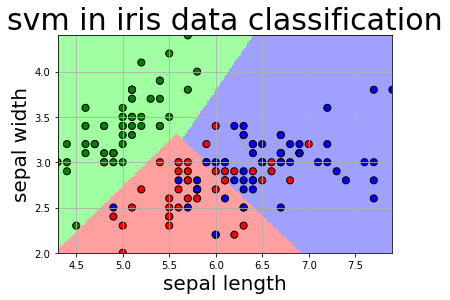

In [20]:
# 5.模型使用
draw(clf,x )